# Import

## Import library

In [1]:
# # colab
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')

if get_ipython():
    print("jupyter envirionment")
    PROJECT_DIR = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))
    from tqdm import tqdm_notebook as tqdm  # 이거 안해주면 한 줄씩 출력됨 ;;
else:
    print("command shell envirionment")
    PROJECT_DIR = os.path.abspath(os.path.join(os.path.dirname(__file__), '..'))
    from tqdm import tqdm

# sys.pathdp PROJECT_DIR 추가
sys.path.insert(0, PROJECT_DIR)

jupyter envirionment


In [2]:
DATA_DIR = PROJECT_DIR + '/ext/data'
RAW_DATA_DIR = DATA_DIR + '/raw'

## Import data

생성요약과 추출요약 데이터 값이나 수는 동일
(다만ID가 다를 수 있음)

In [4]:
with open(RAW_DATA_DIR + '/ext/train.jsonl', 'r') as json_file:
    json_list = list(json_file)

trains = []
for json_str in json_list:
    line = json.loads(json_str)
    trains.append(line)

train_df = pd.DataFrame(trains)
train_df.head()

,media,id,article_original,abstractive,extractive
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]"
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]"
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]"
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]"
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]"


데이터는 media, id, article_original, abstractive	extractive로 구성되어 있습니다.

In [5]:
train_df['extractive_sents'] = train_df.apply(lambda row: list(np.array(row['article_original'])[row['extractive']]) , axis=1)
train_df['no_extractive_sents'] = train_df.apply(lambda row: [sent for sent in row['article_original'] if sent not in row['extractive_sents']] , axis=1)
train_df.head()

,media,id,article_original,abstractive,extractive,extractive_sents,no_extractive_sents
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]",[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,"[문제의 문자메세지를 전달받은 문화관광과는 감사법무담당관에게 조사를 의뢰했다., 권..."
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]",[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,[최지만은 2일(한국시간) 미국 플로리다주 세인트피터즈버그 트로피카나 필드에서 열린...
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]",[16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가...,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로..."
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]",[대구·경북첨단의료산업진흥재단(이하 대구첨복재단) 의약생산센터는 주세제 특수제제인 ...,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]",[식품의약품안전처는 29일 여름철 어린이가 즐겨 마시는 탄산음료 282개와 혼합음료...,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...


# EDA

## media 분포

In [8]:
train_df['media'].value_counts()

기호일보      7166
국제신문      6678
대전일보      4831
광주일보      4155
남도일보      4148
광주매일신문    3783
대구신문      3750
대구일보      3060
경기일보      2319
당진시대      2014
광양신문       899
Name: media, dtype: int64

총 11개 media로부터 데이터가 구성되어 있습니다. 가장 수가 적은 광양신문도 899개로 적지 않아 media별로 요약문 특성이 다르다면 좋은 정보가 될 수 있습니다.

## 원문(article_original)

In [9]:
train_df['article_original'][1]

['미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있다.',
 'LA 에인절스의 최지만은 맹활약으로 주전 입지를 굳혀가는 반면 텍사스 레인저스의 추신수는 개막전 선발에서 밀려나는 수모를 당한 뒤에서도 좀처럼 반등을 하지 못하고 있다.',
 '최지만은 2일(한국시간) 미국 플로리다주 세인트피터즈버그 트로피카나 필드에서 열린 2019 미국프로야구 메이저리그 콜로라도 로키스와 홈경기에 3번 타자 1루수로 선발 출전해 4타수 2안타를 치고 1득점을 올렸다.',
 '시즌 타율은 0.250에서 0.313(16타수 5안타)로 올랐다.',
 '최지만은 개막전에서 4타수 무안타로 침묵했으나 이후 3경기 연속 안타이자 2경기 연속 멀티 히트를 뽑아내며 입지를 굳혀갔다.',
 '2016년 LA 에인절스 소속으로 메이저리그에 데뷔한 최지만이 2경기 연속 멀티 히트를 친 것은 이번이 처음이다.',
 '스코어가 벌어진 탓에 콜로라도 불펜의 필승조인 오승환과 최지만의 맞대결은 성사되지 않았다.',
 '추신수는 들쭉날쭉한 출전 일정 탓인지 타격감을 찾지 못하고 있다.',
 '추신수는 이날 텍사스주 알링턴 글로브 라이프 파크에서 열린 휴스턴 애스트로스와 홈경기에 1번 지명타자로 선발 출전했지만 4타수 무안타로 침묵했다.',
 '시즌 타율은 0.167에서 0.100(10타수 1안타)로 떨어졌다.',
 '추신수는 11년 만에 개막전 선발 라인업에서 제외되는 등 이날까지 텍사스가 치른 4경기 가운데 2경기에만 선발 출전했다.',
 '크리스 우드워드 텍사스 감독은 상대 선발이 좌완이면 좌타자인 추신수 대신 우타자인 헌터 펜스를 선발 지명타자로 기용하고 있다.',
 '텍사스(2승 2패)는 휴스턴 마운드에 2안타로 꽁꽁 묶이며 1-2로 패해 2연승 행진을 마감했다.',
 '한편 피츠버그 파이리츠의 강정호는 914일 만에 홈경기에 나섰지만 안타를 만들어내지 못했다.',
 '이날 펜실베이니아주 피츠버그의 PNC 파크에서 열린 세인트루이스 카디널스와 홈 개막전에 선발 라인업

article_original 데이터는 문장이 이미 분리되어 list로 구성되어 있어 sentence tokenizing 과정 없이 바로 분석이 가능합니다.

<AxesSubplot:xlabel='article_original'>

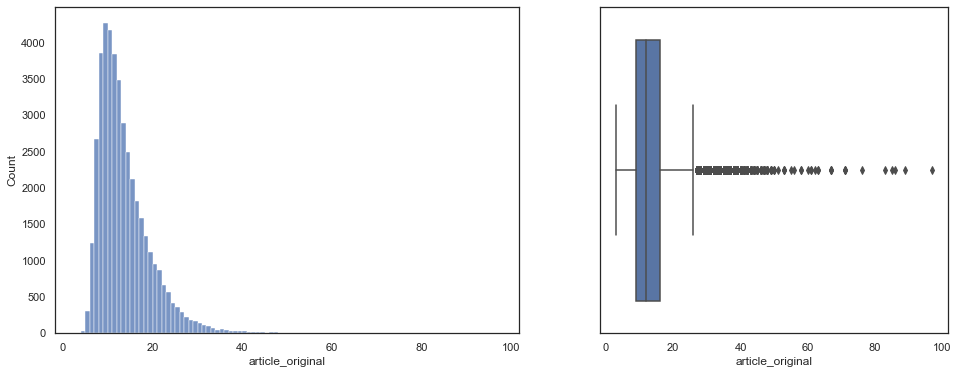

In [10]:
# sentence
original_sent_counts = train_df['article_original'].apply(len)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_sent_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_sent_counts, ax=axs[1])

In [ ]:
original_sent_counts.describe()

count    42803.000000
mean        13.256594
std          5.965359
min          3.000000
25%          9.000000
50%         12.000000
75%         16.000000
max         97.000000
Name: article_original, dtype: float64

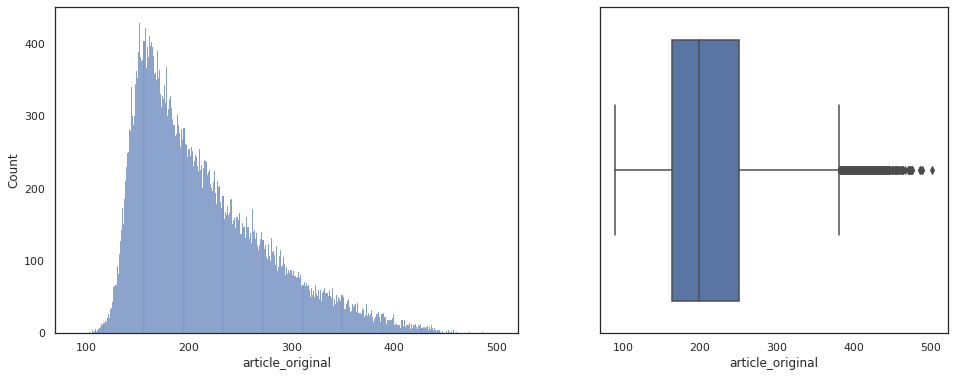

In [ ]:
# word 수
original_word_counts = train_df['article_original'].apply(lambda x:len(' '.join(x).split(' ')))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(original_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(original_word_counts, ax=axs[1])

In [ ]:
original_word_counts.describe()

count    42803.000000
mean       214.226456
std         64.350373
min         90.000000
25%        164.000000
50%        198.000000
75%        251.000000
max        501.000000
Name: article_original, dtype: float64

본문의 길이는 평균 13문장 및 214개 정도의 단어로 구성되어 있습니다.   
이는 기존 summary task에서 많이 쓰이는 CNN(평균 34문장, 760단어)이나 DailyMail(평균 29문장, 653단어) 같은 데이터와 비교했을 때    
상당히 길이가 적은 편에 속한다고 할 수 있습니다.

## 생성요약 정답(abstractive)

In [ ]:
train_df['abstractive'][0]

"지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라'라는 문자 등으로 불거진 합창단의 의무 불이행 논란에 대해 행정사무조사특별위원회를 구성해 조사를 수행하겠다는 의견을 표명했다."

### Novel N-gram

원문 문장(article_original)과 사람이 생성한 요약문장(abstractive) 간 단어가 얼마나 겹치는지 확인 

#### 함수 테스트

In [77]:
# from konlpy.tag import Mecab

# tokenizer = Mecab()
# tokenizer.morphs("지난 6일  당진시의회 행정사무감사가 이루어졌다.")

['지난', '6', '일', '당진시', '의회', '행정', '사무', '감사', '가', '이루', '어', '졌', '다', '.']

In [132]:
def n_grams(tokens, n):
    """
    If length of tokens less then n, return empty list
    """
    l = len(tokens)
    return [tuple(tokens[i:i + n]) for i in range(l) if i + n <= l]

In [134]:
print(n_grams(['건너뛰기'], 2))
print(n_grams(['건너뛰기', 'ad', 'sdf'], 2))

[]
[('건너뛰기', 'ad'), ('ad', 'sdf')]


In [145]:
def cal_novel(source, summary, n=2, use_tokenizer=False):
    if use_tokenizer == True:
        pass
#         tokenizer = Mecab()
#         source_tokens = tokenizer.morphs(source)
#         summary_tokens = tokenizer.morphs(summary)
    else:
        source_tokens  = source.split()
        summary_tokens = summary.split()
        
    source_grams = set(n_grams(source_tokens, n))
    summary_grams = set(n_grams(summary_tokens, n))

    joint = summary_grams.intersection(source_grams)
    novel = summary_grams - joint

    return len(novel), len(summary_grams)

        
def cal_novel_repeat(source_lines, summary_lines, n=2, use_tokenizer=False):
    assert len(source_lines) == len(summary_lines)
    
    lines = zip(source_lines, summary_lines)
    
    novel_n_grams_prop_list = []
    total_novel_grams_num = 0
    total_summary_grams_num = 0
    for source, summary in lines:
        novel_grams_num, summary_grams_num = cal_novel(source, summary, n, use_tokenizer)
        novel_n_grams_prop_list.append(novel_grams_num / (summary_grams_num + 1e-6))
        total_novel_grams_num += novel_grams_num
        total_summary_grams_num += summary_grams_num
    return novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num

#### Novel N-gram 구해보기

In [146]:
origin_text = train_df['article_original'].apply(lambda l: ' '.join(l) )
summary_text = train_df['abstractive']

0.29965738845226947


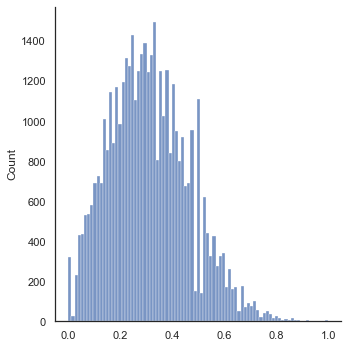

In [147]:
# 1-gram
novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num = cal_novel_repeat(origin_text, summary_text, 1)
print(total_novel_grams_num / total_summary_grams_num)
sns.displot(novel_n_grams_prop_list)

0.5465292075477393


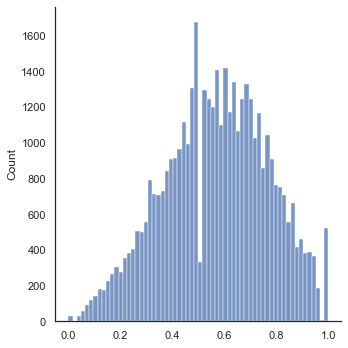

In [148]:
# 2-gram
novel_n_grams_prop_list, total_novel_grams_num, total_summary_grams_num = cal_novel_repeat(origin_text, summary_text, 2)
print(total_novel_grams_num / total_summary_grams_num)
sns.displot(novel_n_grams_prop_list)

### Sentence 분포

In [16]:
# !pip install kss
import kss

#### Sentence split test

In [21]:
last_char = set()
counter = 5
for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        if counter > 0:
            print(sents_splited)
            counter -= 1
        for sent_splited in sents_splited:
            last_char.add(sent_splited[-1])
last_char

['3일 한국자동차산업협회와 한국수입자동차협회에 따르면 한국지엠(GM)과 르노삼성 등 국내 완성차업체가 모회사의 해외 생산 차량을 수입해 국내에 판매하는 OEM 수입차의 판매량이 2017년까지 하락세를 보이다', '지난해 반등했으며 수입차 대비 비중도 높아질 전망이다.']
['2019광주세계수영선수권대회 기간 중 조선대학교에서는 수영대회의 ‘백미’인 하이다', '이빙 경기가 치러지며 조선대 본관 건물과 무등산을 배경으로 27m 높은 곳에서 뛰어내리는 아찔한 광경을 순간 포착하는 등 전 세계에 광주를 알릴 수 있는 절호의 기회가 될 것으로 보이고 하이다', '이빙은 단순히 경기를 넘어서 역동적이고 예술적인 모습이 포착되는 종목이어서 관객들의 시선과 탄성을 자아낼 것으로 보인다.']
['전과 8범 A씨는 아동청소년 강간미수 혐의로 징역1년 3월형을 살고, 5년간 전자발찌 부착 명령상태에서 지난 17일 전자발찌를 끊고 도주하다', '광주 북부경찰서가 검거하여 부착기간이 2020년 8월14일까지 늘었다.']
["자유한국당 소속 윤상현 국회 외교통일위원장은 29일 일제 강점기 강제 징용 피해자에 대한 일본 기업의 배상문제로 한일관계가 역대 최악이라며 일본의 '코리아 패싱(한국 때리기)'이 심각하다고 말했다.", '일본 정보는 일본 전범 기업들에 배상을 명령한 작년 10월의 한국 대법원 판결과 관련해 1965년 체결된 한일청구권협정에 따라 배상 문제는 해결된 것이라고 주장하며 판결 이행을 거부한 채 지난 20일 한국 정부에 제3국 위원을 포함한 중재위원회 개최를 요청했다.', '윤의원은 일본 중의원 외교위원장도 접촉해 징용 문제를 둘러싼 양국 간 갈등 해소 방안을 놓고 의견을 나눠보고 싶었지만 만나는 것조차 꺼리는 바람에 회동하지 못했다고 밝혔다.']
["경기도는 지난 5일 경기창조경제혁신센터에서 국내외청년 200여 명이 참석한 '평화대담 토크쇼 비정상회담'을 개최했으며 이 날 청년들은 남북 정상회담과 북미 정상회담, 한반도 평화 실현의 방해요", "인 등에 대해 이야기

{',', '.', ':', '?', 'c', '‘', 'ㄱ', '다', '요', '\ufeff'}

kss 라이브러리를 활용하여 sentence split을 시행하였으나, 실제로 문장이 나눠지지 않아야 하는 부분들을 나누는 현상이 있음.
또한 일부 abstractive summary에 이상 문자가 존재함을 발견

In [ ]:
for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        is_multi_sent = False
        for sent_splited in sents_splited:
            if sent_splited[-1] in ['?', ':', 'c', '‘', 'ㄱ', '\ufeff']:
                print(abstractive)

2017년 9월부터 2월까지 경남 산청군 단성면 연수원 및 야구장을 관리한 직원이 경성대 학내 게시판에 총장을 비판하는 글을 올렸다가 산청에 발령을 받았다며 국가인권위원회에 진정을 접수한 것으로 알려졌다.:
농촌지역 인구가 고령화하면서 농·어·임업 활동을 포기하거나 아예 업종을 바꾸는 전국적인 추세에 따라 '2018 농림어업조사' 결과에서 충남지역 농가는 12만 3000가구로 전년 12만 6000가구 대비 1.9% 줄었으며 어가, 임가도 일제히 감소한 것으로 나타났다.c
자유 한국당 송언석 의원은 28일 우리나라 경제성장률이 10년 만에 최저치 도달이 좌파식 경제 실험이냐고 따졌으며 대통령 취임식에서 언급한 ‘한 번도 경험해보지 못한 나라’의 종착점이 ‘모두 함께 힘들게 사는 나라’는 아니지 않는가?”라고 반문하면서 기업의 기(氣)를 북도우는 정책을 추진해 국가 경제회복에 앞장서야 한다”고 주장했다.
 23일 환경부의 ‘4대강 조사·평가 기획위원회’가 전날 금강과 영산강의 보 5개 가운데 3개를 해체하고 2개는 상시 개방하는 안을 제시한 것에 대해 민주·평화·정의 등 범진보진영 정당들은 일제히 환영의 목소리를 내며 합당한 조치라고 평가한 반면  한국당은 비판이지만 바른미래당은 지도부 논의를 거쳐 추후 입장을 발표할 예정이다. ‘
영화 ‘추격자’가 TV 방영하면서 실시간 검색어에 오르며 관심을 모으고 있는 가운데 한 인터뷰에서 한재덕 대표에게 나홍진 감독 차기작이 우범곤 총기 사건을 모티프로 한다는 그 영화인가?”라고 질문하자 나홍진 감독과는 구두로 "함께 하자"고 이야기를 나눈 상태라고 답했다.
광양시는 지역경제를 되살리기 위한 구봉산 관광단지 조성 산업 추진 사업설명회를 실시할 예정이다.ㄱ
대구는 19일 DGB대구은행파크에서 열린 프로축구 K리그1 12라운드 인천 유나이티전에서 전반 세징야의 선제골과 후반 에드가의 결승골로 2-1 승리하며 선두권 도약의 발판을 마련하게 됐다.
﻿
﻿
3월 4일부터 31일까지 대전일보사 1층 복합문화예술공간 Lab MAR's 

#### sentence split 시행(kss를 보완)

In [ ]:
multi_abstractives = []
for abstractive in train_df['abstractive'].values:
    sents_splited = kss.split_sentences(abstractive)
    if len(sents_splited) > 1:
        is_multi_sent = False
        for sent_splited in sents_splited:
            if sent_splited[-1] in ['.','?' ]:
                is_multi_sent = True
            else:
                is_multi_sent = False
                break
        if is_multi_sent:
            multi_abstractives.append(sents_splited)
print(len(multi_abstractives))
multi_abstractives

86


[["자유한국당 소속 윤상현 국회 외교통일위원장은 29일 일제 강점기 강제 징용 피해자에 대한 일본 기업의 배상문제로 한일관계가 역대 최악이라며 일본의 '코리아 패싱(한국 때리기)'이 심각하다고 말했다.",
  '일본 정보는 일본 전범 기업들에 배상을 명령한 작년 10월의 한국 대법원 판결과 관련해 1965년 체결된 한일청구권협정에 따라 배상 문제는 해결된 것이라고 주장하며 판결 이행을 거부한 채 지난 20일 한국 정부에 제3국 위원을 포함한 중재위원회 개최를 요청했다.',
  '윤의원은 일본 중의원 외교위원장도 접촉해 징용 문제를 둘러싼 양국 간 갈등 해소 방안을 놓고 의견을 나눠보고 싶었지만 만나는 것조차 꺼리는 바람에 회동하지 못했다고 밝혔다.'],
 ["농림축산식품부는 청년층의 농업분야 창업 활성화를 위해 2019년 '청년창업농 영농정착지원사업' 대상자를 선발하고 각 시군을 통해 통보했으며, 앞으로 지원 대상자 1600명에 대해서는 최장 3년간 매월 100만원씩 창업자금과 함께 영농기술 교육 등 맞춤형 지원을 제공한다고 14일 발표했다.",
  '농식품부는 했다고 14일 밝혔다.'],
 ['남도일보 기고-인위적인 사고로 대형 인명·재산 피해가 발생되면 안전불감증이 불러온 대형참사 되풀이되고 있다.',
  '안전국민의식과 소방안전의식, 대처능력을 높이는 소방안전 조기교육이 시급하다.'],
 ["한전산업개발은 그린에너지 엑스포에서 통합형 ESS인 'KEPID-ESS-200'을 선보였다.",
  '이 장치는 100kW미만의 소규모 태양광 발전소와 연계할 수 있으며, 일반적인 배터리룸보다 외부 기온에 영향을 받지 않고  최적의 성능을 유지할 수 있는 장점이 있다.'],
 ['인천에너지전환네트워크는 인천시에 수도권 전력 소비의 20%를 맡는 영흥 석탄발전소가 2017년 기준 온실가스 3천196만7천t을 배출했으며, 이외에도 미세먼지, 해양에 배출하는 온배수 등으로 인근 주민과 해양생태계에 피해를 줘 석탄발전 폐쇄 로드맵 수립을 촉구했다.',
  '17일 인천시청

대부분이 1문장으로 구성되어 있으며 일부(86개)만 2문장 이상으로 구성되어 있음

### Word 분포

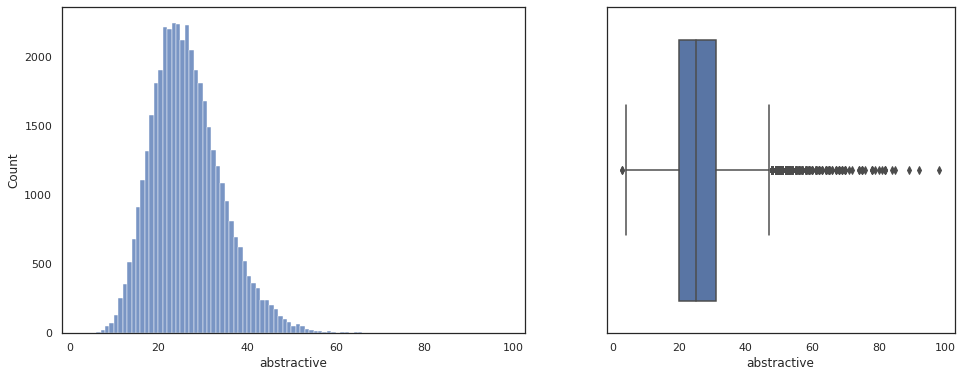

In [26]:
# word 수
import re
abstractive_word_counts = train_df['abstractive'].apply(lambda x:len(re.split('\s', x)))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(abstractive_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(abstractive_word_counts, ax=axs[1])

In [ ]:
abstractive_word_counts.describe()

count    42803.000000
mean        26.113427
std          8.133630
min          3.000000
25%         20.000000
50%         25.000000
75%         31.000000
max         98.000000
Name: abstractive, dtype: float64

## 추출요약 정답(extractive)

In [ ]:
train_df['extractive'][1]

[0, 1, 3]

In [ ]:
train_df['extractive_sents'][1]

['미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있다.',
 'LA 에인절스의 최지만은 맹활약으로 주전 입지를 굳혀가는 반면 텍사스 레인저스의 추신수는 개막전 선발에서 밀려나는 수모를 당한 뒤에서도 좀처럼 반등을 하지 못하고 있다.',
 '시즌 타율은 0.250에서 0.313(16타수 5안타)로 올랐다.']

In [ ]:
# train_df['extractive_sents'].apply(lambda tmp_list: ' '.join(tmp_list) )

0        당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것으...
1        미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있다...
2        16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...
3        대구·경북첨단의료산업진흥재단(이하 대구첨복재단) 의약생산센터는 주세제 특수제제인 세...
4        식품의약품안전처는 29일 여름철 어린이가 즐겨 마시는 탄산음료 282개와 혼합음료 ...
                               ...                        
42798    칠곡북삼초등학교(교장 서금자)에서는 지난달 7일부터 18일까지 3-5학년 학생 중 ...
42799    최근 5년간, LH공공임대 임차인이 사망했으나 상속되거나 반환되지 못한 임대보증금이...
42800    경기도의 ‘DMZ 155마일 걷기’ 행사가 5일 오전 파주 임진각에서 열린 출정식을...
42801    지난 14일 기준 휘발유 가격이 가장 저렴한 곳은 AJ토탈(주)당진주유소(신평)였으...
42802    양승조 충남도지사는 12일 대기오염물질 배출 주요 사업장인 현대제철㈜ 당진공장을 찾...
Name: extractive_sents, Length: 42803, dtype: object

### Sentence 분포

In [153]:
import collections

temp = []
for l in train_df['extractive']:
    temp.append(len(l))
    
collections.Counter(temp)

Counter({3: 42566, 2: 234, 1: 3})

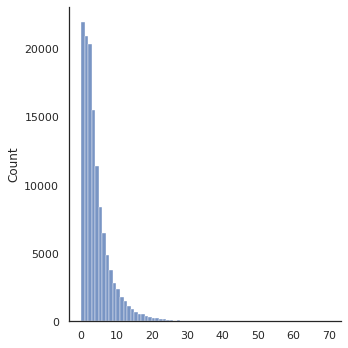

In [ ]:
extractives = []
for extractive_idxes in train_df['extractive'].values:
    extractives += extractive_idxes

sns.displot(extractives, binwidth=1)  # , x="flipper_length_mm"

데이터가 뉴스임에 따라 글의 앞 문장일수록 extractive summary에 포함될 확률이 굉장히 높음

### Word 분포

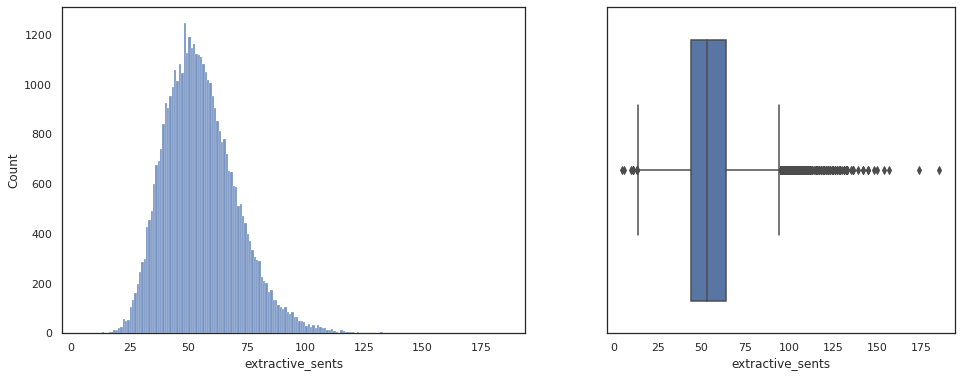

In [ ]:
# word 수
extractive_word_counts = train_df['extractive_sents'].apply(lambda x:len(' '.join(x).split(' ')))

fig, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))
sns.histplot(extractive_word_counts, binwidth=1, ax=axs[0])
sns.boxplot(extractive_word_counts, ax=axs[1])

## 데이터 내 키워드 bi-gram 분포

In [ ]:
# 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# !pip install sklearn

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

### 키워드 추출

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

Text(0.5, 0.98, 'Common bigrams')

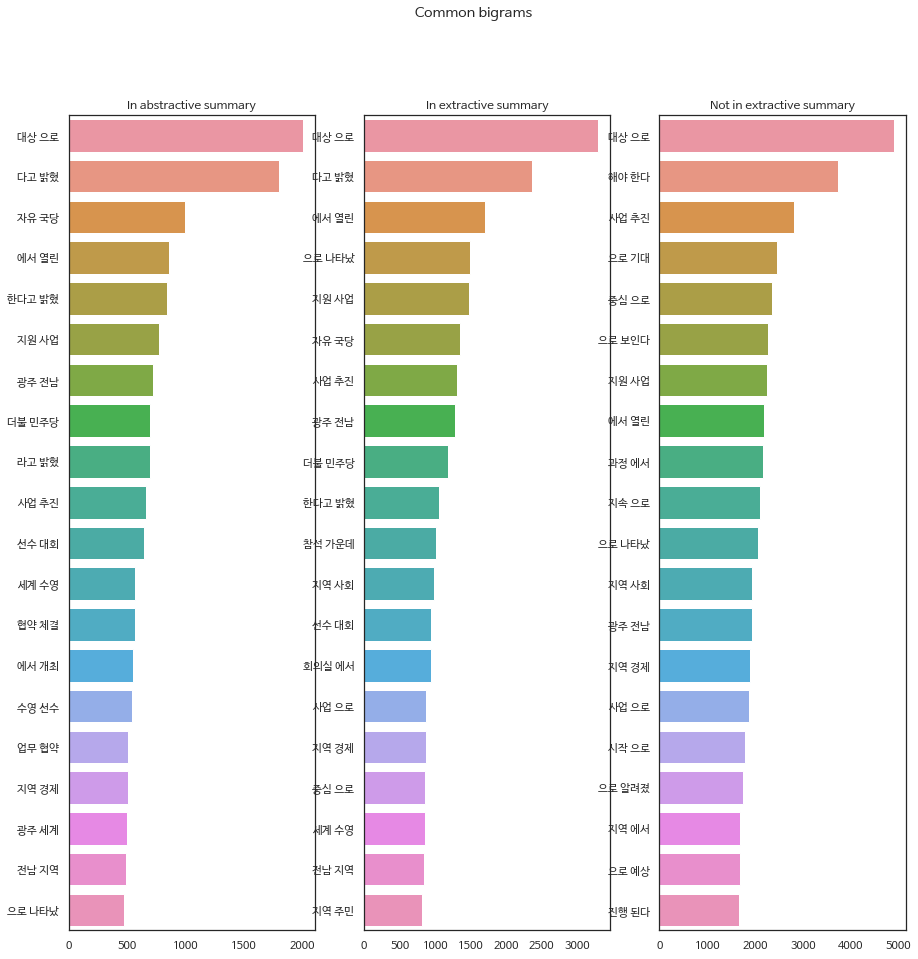

In [14]:
from konlpy.tag import Mecab
tokenizer = Mecab()

fig,ax=plt.subplots(1,3,figsize=(15,15))

doc = train_df['abstractive']
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))
top_n_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,ax=ax[0]).set_title('In abstractive summary') # ,color=colors[i+1]

doc = train_df['extractive_sents'].apply(lambda tmp_list: ' '.join(tmp_list) )
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))
top_n_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,ax=ax[1]).set_title('In extractive summary') # ,color=colors[i+1]

doc = train_df['no_extractive_sents'].apply(lambda tmp_list: ' '.join(tmp_list) )
doc = doc.apply(lambda sent: ' '.join(tokenizer.morphs(sent)))
top_n_bigrams=get_top_ngram(doc,2)[:20]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,ax=ax[2]).set_title('Not in extractive summary') # ,color=colors[i+1]

    
fig.suptitle("Common bigrams")